# Battle of the Neighborhoods

- Coursera Capstone Project

### 1. Introduction

A start-up company plans to expand and grow its business in **Australia** in the next five years. Its founders are looking to establish a headquarters in  `Melbourne, Victoria`.  Furthermore, the company needs to provide a sustainable, comfortable, and safe work-life environment for their senior-level employees who will travel to Australia and supervise the business establishment. This project will use machine learning techniques to anylze the characteristics for the neighbourhoods (suburbs) in Melbourne regarding *crimes*, *venues*, and *rental prices* to determine the best possible suburbs to meet their requirements. At last, a list of recommended neighbourhoods (suburbs) with a full report will be submitted to the company based on the analysis of the clustering results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
import re

### 2. Collect and Explore Dataset

Accquire the information of neighborhoods (suburbs) in Melbourne and Sydney from wikipedia

https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs


### Metropolitan Melbourne

Extract `name`, `postcodes`, and `councils` for suburbs in Metropolitan Melbourne

In [2]:
from bs4 import BeautifulSoup
import requests


MELBOURNE_URL = 'https://en.wikipedia.org/wiki/List_of_Melbourne_suburbs'
html_content = requests.get(MELBOURNE_URL).text

soup = BeautifulSoup(html_content, 'html.parser')

In [3]:

import re
html = soup.find_all(['h3','ul'])
melbourne_data = []
council=[]
for item in html:
    if item.name == 'h3':
        council = re.findall(r'\b[A-Z]\w+? of \b[A-Z,a-z, ]*',item.get_text())
        if council:
            pocket_council = council
            
    elif item.name == 'ul' and council:
        html_lis = item.find_all('li')
        for i in range(len(html_lis)):
            temp = html_lis[i].get_text()
            suburb = re.findall(r'\b[A-Z,a-z, ]* \d{4}', temp)
            if suburb and len(suburb[0]) < 40:
                suburb = suburb[0].split(' ')
                suburb_name = ''
                for j in range(len(suburb)-1):
                    suburb_name += suburb[j]
                
                    if j == (len(suburb)-2):
                        break
                    
                    suburb_name += ' '
                temp_list = [suburb_name,suburb[-1]]
                temp_list.append(pocket_council[0])
                melbourne_data.append(temp_list)   
melbourne_data

[['Carlton', '3053', 'City of Melbourne'],
 ['Carlton North', '3054', 'City of Melbourne'],
 ['Docklands', '3008', 'City of Melbourne'],
 ['East Melbourne', '3002', 'City of Melbourne'],
 ['Flemington', '3031', 'City of Melbourne'],
 ['Kensington', '3031', 'City of Melbourne'],
 ['Melbourne', '3000', 'City of Melbourne'],
 ['Melbourne', '3004', 'City of Melbourne'],
 ['North Melbourne', '3051', 'City of Melbourne'],
 ['Parkville', '3052', 'City of Melbourne'],
 ['Port Melbourne', '3207', 'City of Melbourne'],
 ['Southbank', '3006', 'City of Melbourne'],
 ['South Wharf', '3006', 'City of Melbourne'],
 ['South Yarra', '3141', 'City of Melbourne'],
 ['West Melbourne', '3003', 'City of Melbourne'],
 ['Albert Park', '3206', 'City of Port Phillip'],
 ['Balaclava', '3183', 'City of Port Phillip'],
 ['Elwood', '3184', 'City of Port Phillip'],
 ['Melbourne', '3004', 'City of Port Phillip'],
 ['Middle Park', '3206', 'City of Port Phillip'],
 ['Port Melbourne', '3207', 'City of Port Phillip'],
 [

In [4]:
melbourne_df = pd.DataFrame(melbourne_data,columns=['Suburb','Postcode','Council'])
melbourne_df.head()

,Suburb,Postcode,Council
0,Carlton,3053,City of Melbourne
1,Carlton North,3054,City of Melbourne
2,Docklands,3008,City of Melbourne
3,East Melbourne,3002,City of Melbourne
4,Flemington,3031,City of Melbourne


In [5]:
melbourne_df.shape

(585, 3)

In [6]:
melbourne_df = melbourne_df.sort_values('Postcode').reset_index(drop=True)
melbourne_df.head()

,Suburb,Postcode,Council
0,October,2007,City of Wyndham
1,Use dmy dates from October,2012,City of Wyndham
2,Melbourne,3000,City of Melbourne
3,East Melbourne,3002,City of Melbourne
4,West Melbourne,3003,City of Melbourne


In [7]:
melbourne_df = melbourne_df.drop(index=[0,1]).reset_index(drop=True)
melbourne_df.head()

,Suburb,Postcode,Council
0,Melbourne,3000,City of Melbourne
1,East Melbourne,3002,City of Melbourne
2,West Melbourne,3003,City of Melbourne
3,Melbourne,3004,City of Melbourne
4,Melbourne,3004,City of Port Phillip


In [8]:
melbourne_df.shape

(583, 3)

In [9]:
melbourne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Suburb    583 non-null    object
 1   Postcode  583 non-null    object
 2   Council   583 non-null    object
dtypes: object(3)
memory usage: 13.8+ KB


In [10]:
# change the data type of postcode for later work
melbourne_df['Postcode'] = melbourne_df['Postcode'].astype('int64')
melbourne_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Suburb    583 non-null    object
 1   Postcode  583 non-null    int64 
 2   Council   583 non-null    object
dtypes: int64(1), object(2)
memory usage: 13.8+ KB


In [11]:
melbourne_df.Suburb.value_counts()

Melbourne       3
Bundoora        3
Tullamarine     3
Lyndhurst       2
Wonga Park      2
               ..
Carrum Downs    1
St Helena       1
Warneet         1
Ripponlea       1
Murrumbeena     1
Name: Suburb, Length: 531, dtype: int64

In [12]:
melbourne_df_non_dup = melbourne_df.drop_duplicates(['Suburb','Postcode']).reset_index(drop=True)
melbourne_df_non_dup.head(10)

,Suburb,Postcode,Council
0,Melbourne,3000,City of Melbourne
1,East Melbourne,3002,City of Melbourne
2,West Melbourne,3003,City of Melbourne
3,Melbourne,3004,City of Melbourne
4,South Wharf,3006,City of Port Phillip
5,Southbank,3006,City of Port Phillip
6,Docklands,3008,City of Melbourne
7,Seddon,3011,City of Maribyrnong
8,Footscray,3011,City of Maribyrnong
9,Kingsville,3012,City of Maribyrnong


In [13]:
melbourne_df_non_dup.shape

(532, 3)

In [14]:
melbourne_df_non_dup.loc[melbourne_df_non_dup['Postcode'] == 3004, 'Suburb'] = 'St Kilda Rd'

melbourne_df_non_dup.loc[melbourne_df_non_dup['Postcode'] == 3004]

,Suburb,Postcode,Council
3,St Kilda Rd,3004,City of Melbourne


In [15]:
melbourne_df_non_dup.shape

(532, 3)

In [16]:
# create a function to find coordinates for suburbs based on the name and postcode.
import urllib.parse
def locationfinder(data_df):
    lat = []
    lon = []
    for ix in range(data_df.shape[0]):
        suburb = data_df.loc[ix,'Suburb']
        postcode = data_df.loc[ix,'Postcode']
        address = '{}, Victoria, {}'.format(suburb,postcode)
        url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) + '?format=json'
        response = requests.get(url).json()
        lat.append(response[0]['lat'])
        lon.append(response[0]['lon'])
    return lat,lon

In [17]:
mel_lat, mel_lon = locationfinder(melbourne_df_non_dup)
melbourne_df_non_dup['Latitude'] = mel_lat
melbourne_df_non_dup['Longitude'] = mel_lon

In [18]:
melbourne_df_non_dup.shape

(532, 5)

In [19]:
melbourne_df_non_dup.head(10)

,Suburb,Postcode,Council,Latitude,Longitude
0,Melbourne,3000,City of Melbourne,-37.8142176,144.9631608
1,East Melbourne,3002,City of Melbourne,-37.815588,144.98255534496568
2,West Melbourne,3003,City of Melbourne,-37.8106885,144.9204039725214
3,St Kilda Rd,3004,City of Melbourne,-37.8358215,144.9763639
4,South Wharf,3006,City of Port Phillip,-37.8253445,144.9523945305609
5,Southbank,3006,City of Port Phillip,-37.8253925,144.96357766652397
6,Docklands,3008,City of Melbourne,-37.8178695,144.93865434802785
7,Seddon,3011,City of Maribyrnong,-37.8067725,144.8915967
8,Footscray,3011,City of Maribyrnong,-37.801366,144.9024240873921
9,Kingsville,3012,City of Maribyrnong,-37.80884665601401,144.8553793430576


In [22]:
MELBOURNE_LATITUDE = -37.8136
MELBOURNE_LOGITUDE = 144.9631

In [286]:
import folium

map_metro_melbourne = folium.Map(location=[MELBOURNE_LATITUDE, MELBOURNE_LOGITUDE], zoom_start=10)

for lat, lng, label in zip(melbourne_df_non_dup['Latitude'], melbourne_df_non_dup['Longitude'], melbourne_df_non_dup['Suburb']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        opacity = 0.7,
        fill_opacity=0.6,
        parse_html=False).add_to(map_metro_melbourne)  

map_metro_melbourne

#### Criminal incident data (Metro Melbourne) [2020]

https://www.crimestatistics.vic.gov.au/sites/default/files/embridge_cache/emshare/original/public/users/202103/f1/092cf1840/Data_Tables_LGA_Criminal_Incidents_Year_Ending_December_2020.xlsx

In [24]:
CRIME_VIC_URL = 'https://www.crimestatistics.vic.gov.au/sites/default/files/embridge_cache/emshare/original/public/users/202103/f1/092cf1840/Data_Tables_LGA_Criminal_Incidents_Year_Ending_December_2020.xlsx'
SHEET_CRIME_VIC_NAME = 'Table 03'


victoria_crime_data = pd.read_excel(CRIME_VIC_URL,sheet_name=SHEET_CRIME_VIC_NAME)
victoria_crime_data.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2020,December,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
1,2020,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1
2,2020,December,Alpine,3691,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1
3,2020,December,Alpine,3691,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
4,2020,December,Alpine,3691,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1


In [25]:
victoria_crime_data.rename(columns={'Suburb/Town Name':'Suburb'}, inplace=True)
victoria_crime_data.head()

,Year,Year ending,Local Government Area,Postcode,Suburb,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2020,December,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
1,2020,December,Alpine,3691,Dederang,B Property and deception offences,B40 Theft,B41 Motor vehicle theft,1
2,2020,December,Alpine,3691,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1
3,2020,December,Alpine,3691,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
4,2020,December,Alpine,3691,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1


In [26]:
victoria_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317503 entries, 0 to 317502
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Year                   317503 non-null  int64 
 1   Year ending            317503 non-null  object
 2   Local Government Area  317503 non-null  object
 3   Postcode               317503 non-null  int64 
 4   Suburb                 317503 non-null  object
 5   Offence Division       317503 non-null  object
 6   Offence Subdivision    317503 non-null  object
 7   Offence Subgroup       317503 non-null  object
 8   Incidents Recorded     317503 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 21.8+ MB


In [27]:
victoria_crime_data.shape

(317503, 9)

In [28]:
# change melbourne 3004 to st kilda rd 3004

In [29]:
victoria_crime_data.loc[victoria_crime_data['Postcode'] == 3004, 'Suburb'] = 'St Kilda Rd'
victoria_crime_data.loc[victoria_crime_data['Postcode'] == 3004]

,Year,Year ending,Local Government Area,Postcode,Suburb,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
20543,2020,December,Melbourne,3004,St Kilda Rd,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,3
20544,2020,December,Melbourne,3004,St Kilda Rd,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,14
20545,2020,December,Melbourne,3004,St Kilda Rd,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",12
20546,2020,December,Melbourne,3004,St Kilda Rd,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,6
20547,2020,December,Melbourne,3004,St Kilda Rd,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,13
...,...,...,...,...,...,...,...,...,...
311913,2011,December,Port Phillip,3004,St Kilda Rd,D Public order and security offences,D10 Weapons and explosives offences,D12 Prohibited and controlled weapons offences,3
311914,2011,December,Port Phillip,3004,St Kilda Rd,D Public order and security offences,D20 Disorderly and offensive conduct,D22 Drunk and disorderly in public,7
311915,2011,December,Port Phillip,3004,St Kilda Rd,D Public order and security offences,D20 Disorderly and offensive conduct,D23 Offensive conduct,7
311916,2011,December,Port Phillip,3004,St Kilda Rd,D Public order and security offences,D40 Public security offences,D43 Hacking,1


In [30]:
melbourne_crime_data = victoria_crime_data.merge(melbourne_df_non_dup, how='right',left_on=['Suburb','Postcode'], right_on=['Suburb','Postcode'])
melbourne_crime_data.head(10)

,Year,Year ending,Local Government Area,Postcode,Suburb,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,Council,Latitude,Longitude
0,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,90.0,City of Melbourne,-37.8142176,144.9631608
1,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A20 Assault and related offences,A212 Non-FV Serious assault,349.0,City of Melbourne,-37.8142176,144.9631608
2,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A20 Assault and related offences,"A22 Assault police, emergency services or othe...",102.0,City of Melbourne,-37.8142176,144.9631608
3,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,136.0,City of Melbourne,-37.8142176,144.9631608
4,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,482.0,City of Melbourne,-37.8142176,144.9631608
5,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A50 Robbery,A51 Aggravated robbery,82.0,City of Melbourne,-37.8142176,144.9631608
6,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A50 Robbery,A52 Non-Aggravated robbery,8.0,City of Melbourne,-37.8142176,144.9631608
7,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A711 FV Stalking,22.0,City of Melbourne,-37.8142176,144.9631608
8,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,30.0,City of Melbourne,-37.8142176,144.9631608
9,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A721 FV Harassment and private nuisance,10.0,City of Melbourne,-37.8142176,144.9631608


In [31]:
melbourne_crime_data.shape

(168982, 12)

In [32]:
melbourne_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168982 entries, 0 to 168981
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   168967 non-null  float64
 1   Year ending            168967 non-null  object 
 2   Local Government Area  168967 non-null  object 
 3   Postcode               168982 non-null  int64  
 4   Suburb                 168982 non-null  object 
 5   Offence Division       168967 non-null  object 
 6   Offence Subdivision    168967 non-null  object 
 7   Offence Subgroup       168967 non-null  object 
 8   Incidents Recorded     168967 non-null  float64
 9   Council                168982 non-null  object 
 10  Latitude               168982 non-null  object 
 11  Longitude              168982 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 16.8+ MB


In [33]:
missing_list = melbourne_crime_data[melbourne_crime_data['Incidents Recorded'].isnull()][['Suburb','Postcode']]
missing_list = missing_list.reset_index()
missing_list

,index,Suburb,Postcode
0,17256,Manor Lakes,3024
1,23908,"Flemington, Victoria",3031
2,65907,Bend of Islands,3097
3,135312,Quandong,3340
4,138853,Woodstock,3755
5,142166,Kinglake West,3778
6,146162,Warburton East,3799
7,146163,Monash University,3800
8,150557,Dewhurst,3809
9,153059,Koo Wee Rup North,3891


In [34]:
wrong_postcode = []
rest_list = []
for i in range(missing_list.shape[0]):
    if len(victoria_crime_data[victoria_crime_data['Suburb'] == missing_list.iloc[i,1]]):
        wrong_postcode.append(missing_list.iloc[i,1])
    else:
        if missing_list.iloc[i,1] == 'Monash University' or missing_list.iloc[i,1] == 'Flemington, Victoria':
            continue
        rest_list.append(missing_list.iloc[i,1])
print(wrong_postcode,'\n\n',rest_list)

['Quandong', 'Woodstock', 'Kinglake West', 'Dewhurst', 'Koo Wee Rup North', 'Lang Lang East', 'Yannathan'] 

 ['Manor Lakes', 'Bend of Islands', 'Warburton East', 'HMAS Cerberus', 'Capel Sound', 'Tooradin North']


In [35]:
melbourne_df_non_dup.shape

(532, 5)

In [36]:
postcode_corrections = []
multiple_postcode = []
for name in wrong_postcode:
    postcode = victoria_crime_data[victoria_crime_data['Suburb'] == name]['Postcode'].value_counts().index
    if len(postcode) == 1:
        print(melbourne_df_non_dup[melbourne_df_non_dup['Suburb'] == name][['Suburb','Postcode']])
        melbourne_df_non_dup.loc[melbourne_df_non_dup['Suburb'] == name,'Postcode'] = postcode
        print(melbourne_df_non_dup[melbourne_df_non_dup['Suburb'] == name][['Suburb','Postcode']])
        
        
        postcode_corrections.append([name,postcode[0]])
    else:
        multiple_postcode.append([name,postcode])
if multiple_postcode == []:
    print('\n')
    print('Not Found multiple postcodes in any suburb!')
print('Correction on melbourne_df_non_dup is completed!')
postcode_corrections

       Suburb  Postcode
352  Quandong      3340
       Suburb  Postcode
352  Quandong      3030
        Suburb  Postcode
364  Woodstock      3755
        Suburb  Postcode
364  Woodstock      3751
            Suburb  Postcode
389  Kinglake West      3778
            Suburb  Postcode
389  Kinglake West      3757
       Suburb  Postcode
436  Dewhurst      3809
       Suburb  Postcode
436  Dewhurst      3808
                Suburb  Postcode
457  Koo Wee Rup North      3891
                Suburb  Postcode
457  Koo Wee Rup North      3810
             Suburb  Postcode
458  Lang Lang East      3894
             Suburb  Postcode
458  Lang Lang East      3984
        Suburb  Postcode
459  Yannathan      3894
        Suburb  Postcode
459  Yannathan      3981


Not Found multiple postcodes in any suburb!
Correction on melbourne_df_non_dup is completed!


[['Quandong', 3030],
 ['Woodstock', 3751],
 ['Kinglake West', 3757],
 ['Dewhurst', 3808],
 ['Koo Wee Rup North', 3810],
 ['Lang Lang East', 3984],
 ['Yannathan', 3981]]

In [37]:
melbourne_df_non_dup.shape

(532, 5)

In [38]:
postcode_corrections_df = pd.DataFrame(postcode_corrections,columns= ['Suburb','Postcode'])
postcode_corrections_df

,Suburb,Postcode
0,Quandong,3030
1,Woodstock,3751
2,Kinglake West,3757
3,Dewhurst,3808
4,Koo Wee Rup North,3810
5,Lang Lang East,3984
6,Yannathan,3981


In [39]:
melbourne_df_non_dup.merge(postcode_corrections_df,how='inner')


,Suburb,Postcode,Council,Latitude,Longitude
0,Quandong,3030,City of Wyndham,-37.8388844,144.5538125
1,Woodstock,3751,City of Whittlesea,-37.54608,145.05437385869567
2,Kinglake West,3757,Shire of Nillumbik,-37.478028,145.25571422949724
3,Dewhurst,3808,Shire of Cardinia,-37.9761335,145.47387508579544
4,Koo Wee Rup North,3810,Shire of Cardinia,-38.145267000000004,145.5371992735536
5,Lang Lang East,3984,Shire of Cardinia,-38.270215,145.65643605931228
6,Yannathan,3981,Shire of Cardinia,-38.2242665,145.65067561205592


In [40]:
melbourne_df_non_dup.shape

(532, 5)

In [41]:
melbourne_df_non_dup.drop(melbourne_df_non_dup[melbourne_df_non_dup['Suburb'] == 'Flemington, Victoria'].index, inplace=True)

In [42]:
melbourne_df_non_dup.shape

(531, 5)

In [43]:
victoria_crime_data.loc[victoria_crime_data['Postcode'] == 3800, 'Suburb'] = 'Monash University'
victoria_crime_data[victoria_crime_data['Postcode'] == 3800].head()

,Year,Year ending,Local Government Area,Postcode,Suburb,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
23601,2020,December,Monash,3800,Monash University,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,2
23602,2020,December,Monash,3800,Monash University,A Crimes against the person,A50 Robbery,A51 Aggravated robbery,1
23603,2020,December,Monash,3800,Monash University,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A712 Non-FV Stalking,1
23604,2020,December,Monash,3800,Monash University,A Crimes against the person,"A70 Stalking, harassment and threatening behav...",A722 Non-FV Harassment and private nuisance,2
23605,2020,December,Monash,3800,Monash University,A Crimes against the person,Other crimes against the person,Other crimes against the person,5


In [44]:
# merge two table again
melbourne_crime_data = victoria_crime_data.merge(melbourne_df_non_dup, how='right',left_on=['Suburb','Postcode'], right_on=['Suburb','Postcode'])
melbourne_crime_data.shape

(169561, 12)

In [45]:
melbourne_crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169561 entries, 0 to 169560
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Year                   169555 non-null  float64
 1   Year ending            169555 non-null  object 
 2   Local Government Area  169555 non-null  object 
 3   Postcode               169561 non-null  int64  
 4   Suburb                 169561 non-null  object 
 5   Offence Division       169555 non-null  object 
 6   Offence Subdivision    169555 non-null  object 
 7   Offence Subgroup       169555 non-null  object 
 8   Incidents Recorded     169555 non-null  float64
 9   Council                169561 non-null  object 
 10  Latitude               169561 non-null  object 
 11  Longitude              169561 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 16.8+ MB


In [391]:
melbourne_crime_data_2020 = melbourne_crime_data[melbourne_crime_data['Year'] == 2020]
melbourne_crime_data_2020 = melbourne_crime_data_2020.sort_values('Postcode').reset_index(drop=True)
melbourne_crime_data_2020.head()

,Year,Year ending,Local Government Area,Postcode,Suburb,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded,Council,Latitude,Longitude
0,2020.0,December,Melbourne,3000,Melbourne,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,90.0,City of Melbourne,-37.8142176,144.9631608
1,2020.0,December,Melbourne,3000,Melbourne,D Public order and security offences,D30 Public nuisance offences,D31 Privacy offences,5.0,City of Melbourne,-37.8142176,144.9631608
2,2020.0,December,Melbourne,3000,Melbourne,D Public order and security offences,D20 Disorderly and offensive conduct,D26 Disorderly conduct,24.0,City of Melbourne,-37.8142176,144.9631608
3,2020.0,December,Melbourne,3000,Melbourne,D Public order and security offences,D20 Disorderly and offensive conduct,D25 Criminal intent,28.0,City of Melbourne,-37.8142176,144.9631608
4,2020.0,December,Melbourne,3000,Melbourne,D Public order and security offences,D20 Disorderly and offensive conduct,D24 Offensive language,18.0,City of Melbourne,-37.8142176,144.9631608


In [392]:
melbourne_crime_data_2020.shape

(18031, 12)

In [393]:
melbourne_crime_data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18031 entries, 0 to 18030
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   18031 non-null  float64
 1   Year ending            18031 non-null  object 
 2   Local Government Area  18031 non-null  object 
 3   Postcode               18031 non-null  int64  
 4   Suburb                 18031 non-null  object 
 5   Offence Division       18031 non-null  object 
 6   Offence Subdivision    18031 non-null  object 
 7   Offence Subgroup       18031 non-null  object 
 8   Incidents Recorded     18031 non-null  float64
 9   Council                18031 non-null  object 
 10  Latitude               18031 non-null  object 
 11  Longitude              18031 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 1.7+ MB


In [394]:
melbourne_crime_data_2020.shape

(18031, 12)

In [395]:
melbourne_crime_total_2020 = melbourne_crime_data_2020[['Suburb','Postcode','Incidents Recorded','Latitude','Longitude']].groupby(['Suburb','Postcode']).sum().reset_index()
melbourne_crime_total_2020.head()

,Suburb,Postcode,Incidents Recorded
0,Abbotsford,3067,1287.0
1,Aberfeldie,3040,108.0
2,Airport West,3042,608.0
3,Albanvale,3021,345.0
4,Albert Park,3206,508.0


In [396]:
melbourne_crime_total_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 521 entries, 0 to 520
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Suburb              521 non-null    object 
 1   Postcode            521 non-null    int64  
 2   Incidents Recorded  521 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 12.3+ KB


In [397]:
melbourne_crime_total_2020.describe()

,Postcode,Incidents Recorded
count,521.000000,521.000000
mean,3351.380038,565.614203
std,355.323906,950.276714
min,3000.000000,1.000000
25%,3075.000000,55.000000
50%,3161.000000,271.000000
75%,3781.000000,726.000000
max,3987.000000,13637.000000


In [398]:
melbourne_crime_total_2020.shape

(521, 3)

In [399]:
melbourne_crime_total_2020 = melbourne_crime_total_2020.merge(melbourne_df_non_dup, how='right',left_on=['Suburb','Postcode'],right_on=['Suburb','Postcode'])
melbourne_crime_total_2020.head()

,Suburb,Postcode,Incidents Recorded,Council,Latitude,Longitude
0,Melbourne,3000,13637.0,City of Melbourne,-37.8142176,144.9631608
1,East Melbourne,3002,1110.0,City of Melbourne,-37.815588,144.98255534496568
2,West Melbourne,3003,1093.0,City of Melbourne,-37.8106885,144.9204039725214
3,St Kilda Rd,3004,976.0,City of Melbourne,-37.8358215,144.9763639
4,South Wharf,3006,121.0,City of Port Phillip,-37.8253445,144.9523945305609


In [400]:
melbourne_crime_total_2020.shape

(531, 6)

In [401]:
melbourne_crime_total_2020[melbourne_crime_total_2020['Incidents Recorded'].isnull()]

,Suburb,Postcode,Incidents Recorded,Council,Latitude,Longitude
41,Manor Lakes,3024,NaN,City of Wyndham,-37.8686285,144.5950127
162,Bend of Islands,3097,NaN,Shire of Nillumbik,-37.700545500000004,145.2779438240625
389,Fernshaw,3778,NaN,Shire of Yarra Ranges,-37.6092565,145.61809025925433
420,Warburton East,3799,NaN,Shire of Yarra Ranges,-37.7536223,145.6887265
437,Rythdale,3810,NaN,Shire of Cardinia,-38.14086,145.46192293724448
455,Toorongo,3833,NaN,Shire of Yarra Ranges,-37.7786785,146.0831699915434
457,Lang Lang East,3984,NaN,Shire of Cardinia,-38.270215,145.65643605931228
472,HMAS Cerberus,3920,NaN,Shire of Mornington Peninsula,-38.381676999999996,145.19405481236242
494,Capel Sound,3940,NaN,Shire of Mornington Peninsula,-38.3737241,144.8755654
513,Tooradin North,3977,NaN,Shire of Cardinia,-38.2138303,145.3816827


In [405]:
map_metro_melbourne = folium.Map(location=[MELBOURNE_LATITUDE, MELBOURNE_LOGITUDE], zoom_start=9)

for lat, lng, suburb, postcode, label in zip(melbourne_crime_total_2020['Latitude'], melbourne_crime_total_2020['Longitude'], melbourne_crime_total_2020['Suburb'], melbourne_crime_total_2020['Postcode'], melbourne_crime_total_2020['Incidents Recorded']):
    label_popup = folium.Popup(' {}, {} / Total Crime:{}'.format(suburb,postcode,label), parse_html=True, max_width=150)
    folium.CircleMarker(
        [lat, lng],
        radius=label*0.003,
        popup=label_popup,
        color='black',
        fill=True,
        fill_color = 'red',
        opacity=0.2,
        fill_opacity=0.6,
        parse_html=False).add_to(map_metro_melbourne)     
    
map_metro_melbourne

In [410]:
top_ten_crime_suburbs = melbourne_crime_total_2020.nlargest(10,'Incidents Recorded').reset_index(drop=True)


,Suburb,Postcode,Incidents Recorded,Council,Latitude,Longitude
0,Melbourne,3000,13637.0,City of Melbourne,-37.8142176,144.9631608
1,Dandenong,3175,6071.0,City of Greater Dandenong,-37.9900945,145.2097382471987
2,Frankston,3199,5551.0,City of Frankston,-38.1444729,145.1268808
3,Reservoir,3073,4382.0,City of Darebin,-37.7168415,145.0069944
4,Preston,3072,3832.0,City of Darebin,-37.74089815667651,145.00573100618806
5,Richmond,3121,3794.0,City of Yarra,-37.8203955,145.0025153
6,St Kilda,3182,3576.0,City of Port Phillip,-37.8638261,144.981637
7,Werribee,3030,3452.0,City of Wyndham,-37.907984,144.64167480741185
8,Pakenham,3810,3364.0,Shire of Cardinia,-38.0803615,145.4858119
9,St Albans,3021,3312.0,City of Brimbank,-37.7445766,144.79970234688483


<AxesSubplot:ylabel='Suburb'>

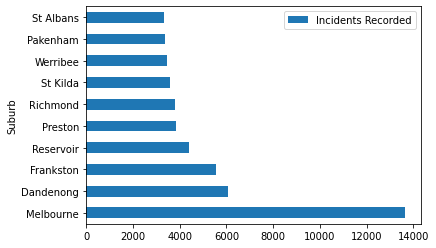

In [413]:
top_ten_crime_suburbs[['Suburb','Incidents Recorded']].plot.barh(x='Suburb',y='Incidents Recorded')

#### Rental Report (Metro Melbourne) [Dec 2020]

https://www.dhhs.vic.gov.au/sites/default/files/documents/202103/Moving%20annual%20rent%20by%20suburb%20-%20December%20quarter%202020.xlsx

In [312]:
RENTAL_VIC_URL = 'https://www.dhhs.vic.gov.au/sites/default/files/documents/202103/Moving%20annual%20rent%20by%20suburb%20-%20December%20quarter%202020.xlsx'
SHEET_RENTAL_VIC_NAME = 'All properties'
victoria_rental_raw = pd.read_excel(RENTAL_VIC_URL,sheet_name=SHEET_RENTAL_VIC_NAME,header=[1,2])

In [313]:
victoria_rental_raw.head()

All properties                                        Mar 2000         \
  Unnamed: 0_level_1                     Unnamed: 1_level_1    Count Median   
0    Inner Melbourne  Albert Park-Middle Park-West St Kilda     1146    260   
1                NaN                               Armadale      729    200   
2                NaN                          Carlton North      864    260   
3                NaN                      Carlton-Parkville     1344    260   
4                NaN                        CBD-St Kilda Rd     2138    320   

  Jun 2000        Sep 2000        Dec 2000         ... Dec 2019         \
     Count Median    Count Median    Count Median  ...    Count Median   
0     1136    260     1177    270     1176    275  ...      848    595   
1      731    200      732    205      732    210  ...      776    485   
2      814    260      800    265      735    270  ...      520    580   
3     1312    260     1306    260     1322    260  ...     4606    420   
4     2269    320     2362    320     2361    320  ...    10840    510   

  Mar 2020        Jun 2020        Sep 2020        Dec 2020         
     Count Median    Count Median    Count Median    Count Median  
0      852    600      826    585      798    560      829    550  
1      753    500      782    500      708    500      715    495  
2      539    585      536    590      519    590      536    590  
3     5211    404     5023    400     4625    400     4655    399  
4    10896    510    11022    495    11295    460    13146    420  

[5 rows x 170 columns]

In [314]:
victoria_rental_raw.shape

(159, 170)

In [339]:
victoria_rental_raw.shape[1]

170

In [348]:
victoria_rental_data = pd.Series(victoria_rental_raw.iloc[:,1],name='Suburb')

# victoria_rental_data
year = 2000

for i in range(2,victoria_rental_raw.shape[1]-7,8):

    col_name = ['Count_Mar_{}'.format(year),
                    'Median_Mar_{}'.format(year),
                    'Count_Jun_{}'.format(year),
                    'Median_Jun_{}'.format(year),
                    'Count_Sep_{}'.format(year),
                    'Median_Sep_{}'.format(year),
                    'Count_Dec_{}'.format(year),
                    'Median_Dec_{}'.format(year),]
    temp_df = pd.DataFrame(np.array(victoria_rental_raw.iloc[:,i:i+8]),columns=col_name)
    try:
        victoria_rental_data = pd.concat([victoria_rental_data, temp_df],axis=1)
    except:
        print(year)
    
    
    year +=1
    
victoria_rental_data.head()

,Suburb,Count_Mar_2000,Median_Mar_2000,Count_Jun_2000,Median_Jun_2000,Count_Sep_2000,Median_Sep_2000,Count_Dec_2000,Median_Dec_2000,Count_Mar_2001,...,Count_Dec_2019,Median_Dec_2019,Count_Mar_2020,Median_Mar_2020,Count_Jun_2020,Median_Jun_2020,Count_Sep_2020,Median_Sep_2020,Count_Dec_2020,Median_Dec_2020
0,Albert Park-Middle Park-West St Kilda,1146,260,1136,260,1177,270,1176,275,1206,...,848,595,852,600,826,585,798,560,829,550
1,Armadale,729,200,731,200,732,205,732,210,716,...,776,485,753,500,782,500,708,500,715,495
2,Carlton North,864,260,814,260,800,265,735,270,715,...,520,580,539,585,536,590,519,590,536,590
3,Carlton-Parkville,1344,260,1312,260,1306,260,1322,260,1272,...,4606,420,5211,404,5023,400,4625,400,4655,399
4,CBD-St Kilda Rd,2138,320,2269,320,2362,320,2361,320,2587,...,10840,510,10896,510,11022,495,11295,460,13146,420


In [349]:
victoria_rental_data.shape

(159, 169)

In [253]:
# victoria_rental_data_2020 = pd.concat([victoria_rental_data.iloc[:,1],victoria_rental_data['Dec 2020']],axis=1)

In [254]:
# victoria_rental_data_2020.rename(columns={victoria_rental_data_2020.columns[0]:'Suburb'}, inplace=True)

In [351]:
victoria_rental_data = victoria_rental_data[victoria_rental_data['Suburb'] != 'Group Total']
victoria_rental_data.shape

(146, 169)

In [377]:
mel_rental_list = []
victoria_rental_data_processed = pd.DataFrame(columns=victoria_rental_data.columns)
# i = 1
for i in range(victoria_rental_data.shape[0]):
    temp_name = re.split(r'-',victoria_rental_data.iloc[i,0])
#     print(temp_name)
    rest_data = np.array(victoria_rental_data.iloc[i,1:])
    
#     temp_count = victoria_rental_data.iloc[i,1]
#     temp_median = victoria_rental_data.iloc[i,2]

    if len(temp_name)>=2:
#         temp_count //=len(temp_name)
        rest_data[::2] //= len(temp_name)
            
        for suburb in temp_name:
            new_data =  pd.DataFrame(np.insert(rest_data,0,suburb).reshape(1,-1),columns=victoria_rental_data.columns)
            victoria_rental_data_processed = victoria_rental_data_processed.append(new_data)
    else:
        temp_name = temp_name[0]
        new_data =  pd.DataFrame(np.insert(rest_data,0,temp_name).reshape(1,-1),columns=victoria_rental_data.columns)
        victoria_rental_data_processed = victoria_rental_data_processed.append(new_data)

victoria_rental_data_processed.head()

,Suburb,Count_Mar_2000,Median_Mar_2000,Count_Jun_2000,Median_Jun_2000,Count_Sep_2000,Median_Sep_2000,Count_Dec_2000,Median_Dec_2000,Count_Mar_2001,...,Count_Dec_2019,Median_Dec_2019,Count_Mar_2020,Median_Mar_2020,Count_Jun_2020,Median_Jun_2020,Count_Sep_2020,Median_Sep_2020,Count_Dec_2020,Median_Dec_2020
0,Albert Park,382,260,378,260,392,270,392,275,402,...,282,595,284,600,275,585,266,560,276,550
0,Middle Park,382,260,378,260,392,270,392,275,402,...,282,595,284,600,275,585,266,560,276,550
0,West St Kilda,382,260,378,260,392,270,392,275,402,...,282,595,284,600,275,585,266,560,276,550
0,Armadale,729,200,731,200,732,205,732,210,716,...,776,485,753,500,782,500,708,500,715,495
0,Carlton North,864,260,814,260,800,265,735,270,715,...,520,580,539,585,536,590,519,590,536,590


In [378]:
victoria_rental_data_processed.shape

(215, 169)

In [379]:
victoria_rental_data_processed.replace('CBD', 'Melbourne', inplace=True)

In [380]:
victoria_rental_data_processed.replace('West St Kilda', 'St Kilda West', inplace=True)

In [381]:
victoria_rental_data_processed.replace('East St Kilda', 'St Kilda East', inplace=True)

In [383]:
victoria_rental_data.describe()

,Count_Mar_2002,Median_Mar_2002,Count_Jun_2002,Median_Jun_2002,Count_Sep_2002,Median_Sep_2002,Count_Dec_2002,Median_Dec_2002,Count_Mar_2003,Median_Mar_2003,...,Count_Dec_2019,Median_Dec_2019,Count_Mar_2020,Median_Mar_2020,Count_Jun_2020,Median_Jun_2020,Count_Sep_2020,Median_Sep_2020,Count_Dec_2020,Median_Dec_2020
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,927.205479,197.924658,934.815068,199.952055,944.404110,201.698630,947.678082,203.267123,964.993151,205.006849,...,1517.390411,418.684932,1528.417808,420.452055,1512.369863,419.130137,1455.835616,417.794521,1454.664384,414.808219
std,517.693225,53.235338,525.727804,53.333735,528.932335,52.909339,529.622532,51.663138,548.376632,50.797162,...,1285.500935,86.937215,1312.148066,87.711210,1316.404408,84.576288,1306.670230,81.445723,1426.232323,77.043231
min,32.000000,90.000000,63.000000,90.000000,71.000000,95.000000,71.000000,95.000000,63.000000,95.000000,...,64.000000,230.000000,65.000000,225.000000,56.000000,230.000000,53.000000,230.000000,50.000000,230.000000
25%,586.250000,160.000000,589.250000,160.000000,587.250000,160.000000,602.500000,165.000000,614.500000,165.000000,...,742.250000,360.000000,753.750000,360.750000,763.000000,360.000000,716.250000,360.000000,726.500000,361.250000
50%,807.500000,190.000000,803.000000,190.000000,823.500000,190.000000,820.000000,192.500000,861.000000,195.000000,...,1228.500000,417.500000,1250.500000,417.500000,1256.500000,412.500000,1196.000000,415.000000,1188.500000,410.000000
75%,1218.000000,225.000000,1209.500000,230.000000,1229.250000,230.000000,1214.000000,230.000000,1218.500000,235.000000,...,1964.500000,470.000000,1953.500000,468.750000,1931.750000,466.000000,1831.250000,460.000000,1789.500000,460.000000
max,3316.000000,360.000000,3423.000000,360.000000,3398.000000,360.000000,3408.000000,350.000000,3754.000000,350.000000,...,10840.000000,700.000000,10896.000000,745.000000,11022.000000,750.000000,11295.000000,733.000000,13146.000000,720.000000


In [384]:
melbourne_rental_data = victoria_rental_data_processed.merge(melbourne_df_non_dup,how='right',on=['Suburb'])
melbourne_rental_data.head()

,Suburb,Count_Mar_2000,Median_Mar_2000,Count_Jun_2000,Median_Jun_2000,Count_Sep_2000,Median_Sep_2000,Count_Dec_2000,Median_Dec_2000,Count_Mar_2001,...,Count_Jun_2020,Median_Jun_2020,Count_Sep_2020,Median_Sep_2020,Count_Dec_2020,Median_Dec_2020,Postcode,Council,Latitude,Longitude
0,Melbourne,1069,320,1134.0,320.0,1181,320,1180,320,1293,...,5511.0,495.0,5647.0,460.0,6573.0,420.0,3000,City of Melbourne,-37.8142176,144.9631608
1,East Melbourne,495,265,490.0,268.0,516,280,506,273,494,...,629.0,550.0,562.0,515.0,544.0,495.0,3002,City of Melbourne,-37.815588,144.98255534496568
2,West Melbourne,468,230,478.0,240.0,491,240,497,242,521,...,1741.0,455.0,1637.0,450.0,1665.0,425.0,3003,City of Melbourne,-37.8106885,144.9204039725214
3,St Kilda Rd,1069,320,1134.0,320.0,1181,320,1180,320,1293,...,5511.0,495.0,5647.0,460.0,6573.0,420.0,3004,City of Melbourne,-37.8358215,144.9763639
4,South Wharf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3006,City of Port Phillip,-37.8253445,144.9523945305609


In [385]:
melbourne_rental_data.shape

(531, 173)

In [386]:
melbourne_rental_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 530
Columns: 173 entries, Suburb to Longitude
dtypes: float64(154), int64(1), object(18)
memory usage: 721.8+ KB


In [390]:
# plot for rental status 2020 dec metro melbourne

In [388]:
mel_rental_2020_dec = melbourne_rental_data[['Suburb','Count_Dec_2020','Median_Dec_2020','Postcode','Latitude','Longitude']]

In [208]:
def plotcmp(x):
    return mp.colors.to_hex(mp.cm.get_cmap('hsv')(x+0.5)[0:3])

In [389]:
import matplotlib as mp
map_metro_melbourne = folium.Map(location=[MELBOURNE_LATITUDE, MELBOURNE_LOGITUDE], zoom_start=10)

for lat, lng, suburb, postcode, count, price in zip(mel_rental_2020_dec['Latitude'], mel_rental_2020_dec['Longitude'], mel_rental_2020_dec['Suburb'], mel_rental_2020_dec['Postcode'], mel_rental_2020_dec['Count_Dec_2020'],mel_rental_2020_dec['Median_Dec_2020']):
    label_popup = folium.Popup(' {}, {} : Total rental properties {} with median price {}'.format(suburb,postcode,count,price), parse_html=True, max_width=150)
    folium.CircleMarker(
        [lat, lng],
        radius=count*0.008,
        popup=label_popup,
        color='black',
        fill=True,
        fill_color = '{}'.format(plotcmp(1-price/mel_rental_2020_dec['Median_Dec_2020'].mean())),
        opacity = 0.1,
        fill_opacity=0.8,
        parse_html=False).add_to(map_metro_melbourne)     
    
map_metro_melbourne

#### Venues in Metro Melbourne

In [219]:
# define Foursquare Credentials and Version
CLIENT_ID = 'LEDK5OOKF4IRDV30JKIFZ0B1T5T3CRTN1PAFIEDI3XUACT5C' # your Foursquare ID
CLIENT_SECRET = 'DEK45GQV3YIOEKRFKYZ04FAVVYSQ1MCZFF1L54UAVKNJUZ3I' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LEDK5OOKF4IRDV30JKIFZ0B1T5T3CRTN1PAFIEDI3XUACT5C
CLIENT_SECRET:DEK45GQV3YIOEKRFKYZ04FAVVYSQ1MCZFF1L54UAVKNJUZ3I


In [223]:
# define a function to call Foursquare API and extracting venue information in given coordinates
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [221]:
# create a dataframe for venues in Downtown Toronto
melbourne_venues = getNearbyVenues(melbourne_df_non_dup['Suburb'],
                                          melbourne_df_non_dup['Latitude'],
                                          melbourne_df_non_dup['Longitude'])

Melbourne
East Melbourne
West Melbourne
St Kilda Rd
South Wharf
Southbank
Docklands
Seddon
Footscray
Kingsville
West Footscray
Brooklyn
Tottenham
Maidstone
Yarraville
South Kingsville
Newport
Spotswood
Williamstown North
Williamstown
Altona
Seaholme
Braybrook
Albion
Sunshine
Sunshine North
Sunshine West
Kings Park
St Albans
Albanvale
Kealba
Ardeer
Deer Park
Cairnlea
Burnside
Burnside Heights
Caroline Springs
Ravenhall
Mount Cottrell
Mambourin
Wyndham Vale
Manor Lakes
Altona North
Laverton North
Williams Landing
Seabrook
Laverton
Altona Meadows
Hoppers Crossing
Tarneit
Truganina
Point Cook
Derrimut
Cocoroc
Werribee
Werribee South
Flemington
Kensington
Ascot Vale
Travancore
Maribyrnong
Keilor East
Avondale Heights
Keilor North
Keilor
Hillside
Calder Park
Sydenham
Delahey
Taylors Lakes
Keilor Downs
Keilor Lodge
Moonee Ponds
Aberfeldie
Essendon
Essendon West
Strathmore Heights
Strathmore
Essendon Fields
Essendon North
Airport West
Keilor Park
Niddrie
Tullamarine
Gowanbrae
Gladstone Park
Pa

In [222]:
melbourne_venues.head()

,Neighborhoods,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Melbourne,-37.8142176,144.9631608,Tipo 00,-37.813527,144.961978,Italian Restaurant
1,Melbourne,-37.8142176,144.9631608,Brother Baba Budan,-37.813445,144.962137,Coffee Shop
2,Melbourne,-37.8142176,144.9631608,Trattoria Emilia,-37.815220,144.962636,Italian Restaurant
3,Melbourne,-37.8142176,144.9631608,Kirk's Wine Bar,-37.813661,144.961351,Wine Bar
4,Melbourne,-37.8142176,144.9631608,Whitehart,-37.812781,144.961973,Bar


In [278]:
top30_venue_mel = melbourne_venues[['Neighborhoods','Venue']].groupby(['Neighborhoods']).count().nlargest(30,'Venue')
top30_venue_mel

,Venue
Neighborhoods,
Fitzroy,100
Melbourne,100
South Yarra,91
Footscray,63
South Melbourne,60
Balaclava,59
Collingwood,59
Glen Waverley,58
Windsor,53


In [ ]:
# plot a pie chart for Victoria Hotel
VH_venues = dt_venues_grouped[dt_venues_grouped['Neighborhoods'] == 'Victoria Hotel'].sort_values('Venue',ascending=False)
plt.figure(figsize=(20,12))
plt.title('Venues in Victoria Hotel', fontsize=20)
plt.pie(VH_venues['Venue'],labels=VH_venues['Venue Category'],rotatelabels=90)
plt.text(1,1,s='Total number of venues is: {}'.format(downtown_toronto_venues_total[downtown_toronto_venues_total['Neighborhoods']=='Victoria Hotel']['Venue'].iloc[0]), fontsize=16)

In [ ]:
def plotpiechart(df):
    plt.figure()
    
    for
    plt.subplot()

### Metropolitan Sydney